# Chapter 7 Other models for tight binding
## 1. Haldane model

In [37]:
import numpy as np
import matplotlib.pyplot as plt

Prepareing a function to set the Hamiltonian.

In [2]:
"""
Calculating the phase factor 
n: Cell label along x axis
m: Cell label along y axis
"""
def exp_f(n, m, kx, ky):
    c = np.sqrt(3)/2
    val = np.exp(complex(0, -n*kx))*np.exp(complex(0, -m*kx*0.5))*np.exp(complex(0, -m*ky*c))
    return val

"""
Hamiltonian for Haldane model
t: Hopping parameter of neighbor hopping.
it: Hopping parameter of second neighbor hopping.
"""
def calc_H_Haldane(kx,ky,t, it, M):
    N = 2
    mat_Htb = np.zeros((N,N), dtype=complex)   
    mat_Htb[0,0] = M + complex(0, 1)*it*(exp_f(0, -1, kx, ky) - exp_f(1, -1, kx, ky)+ exp_f(1, 0,kx, ky) - exp_f(0, 1, kx, ky) + exp_f(-1, 1, kx, ky) - exp_f(-1, 0, kx, ky))
    mat_Htb[0,1] = -t*(exp_f(-1, 0, kx, ky) + exp_f(0, 0, kx, ky) + exp_f(0, -1, kx, ky))
    mat_Htb[1,0] = -t*(exp_f(0, 0, kx, ky) + exp_f(1, 0, kx, ky) + exp_f(0, 1, kx, ky))
    mat_Htb[1,1] = (-1)*M + complex(0, 1)*it*(exp_f(-1, 0, kx, ky)- exp_f(0, -1, kx, ky) + exp_f(1, -1, kx, ky)- exp_f(1, 0,kx, ky) + exp_f(0, 1, kx, ky) - exp_f(-1, 1, kx, ky))
    return mat_Htb


Functions for calculating the band structure

In [337]:
# Band along the given line

def renormarize(mat, ind):
    if ind[0] == 0:
        pass
    else:
        mat[0, :] = mat[0, :]/mat[0, 0] * abs(mat[0, 0])
        mat[1, :] = mat[1, :]/mat[1, 1] * abs(mat[1, 1])
    return mat


def calc_band_line(t, it, M, kx, ky):
    band_0 = []
    band_1 = []
    for x, y in zip(kx, ky):
        mat_H = calc_H_Haldane(x,y,t, it, M)
        energy, mat_v  = np.linalg.eig(mat_H)
        ind = np.argsort(energy)
        energy = energy[ind]
        band_0.append(energy[0])
        band_1.append(energy[1])
    plt.plot(band_0)
    plt.plot(band_1)
    plt.ylabel("Energy", fontsize = 18)
    plt.xticks([0, 100, 200], ["Γ", "K", "K'"], fontsize = 18)
    plt.tick_params(labelsize=14)
    plt.show()

# Band in 2D space
def calc_band_2D(t, it, M, kx, ky):
    kX, kY = np.meshgrid(kx, ky)
    band = np.zeros((len(ky), len(kx)))
    vec_rec_0 = np.zeros((len(ky), len(kx), 2), dtype=complex)
    vec_rec_1 = np.zeros((len(ky), len(kx), 2), dtype=complex)
    ang_rec = np.zeros((len(ky), len(kx)))
    ang_rec2 = np.zeros((len(ky), len(kx)))
    for i in range(len(kx)):
        for j in range(len(ky)):
            x = kx[i]
            y = ky[j]
            mat_H = calc_H_Haldane(x,y,t, it, M)
            energy, mat_v  = np.linalg.eig(mat_H)
            ind = np.argsort(energy)
            energy = energy[ind]
            band[j][i] = energy[0]
            vec = mat_v.T
            vec = vec[ind]
            vec = renormarize(vec, ind)
            vec_rec_0[j][i] = vec[0]
            vec_rec_1[j][i] = vec[1]
            ang_rec[j][i] = np.angle(vec[0][1])
            ang_rec2[j][i] = np.angle(vec[0][0])

    plt.contourf(kX, kY, band)
    plt.gca().set_aspect('equal')
    plt.xlabel("kx", fontsize = 18)
    plt.ylabel("ky", fontsize = 18)
    plt.tick_params(labelsize=14)
    plt.show()
    return vec_rec_0, vec_rec_1, ang_rec, ang_rec2

# Plotting angles in 2D
def plot_ang(kx, ky, ang_p):
    kX, kY = np.meshgrid(kx, ky)
    plt.contourf(kX, kY, ang_p, levels = 20)
    plt.gca().set_aspect('equal')
    plt.xlabel("kx", fontsize = 18)
    plt.ylabel("ky", fontsize = 18)
    plt.tick_params(labelsize=14)
    plt.title("Phase")
    plt.colorbar()
    plt.show()
    
def plot_abs(kx, ky, abs):
    kX, kY = np.meshgrid(kx, ky)
    plt.contourf(kX, kY, amp, levels = 20)
    plt.gca().set_aspect('equal')
    plt.xlabel("kx", fontsize = 18)
    plt.ylabel("ky", fontsize = 18)
    plt.tick_params(labelsize=14)
    plt.title("Ampliture")
    plt.colorbar()
    plt.show()

Function for calculating the Berry connection. 

In [338]:
# Calculaton following the defenition
def Berry_connection(kx, ky, vec, cut = 10, scale = 10):
    kX, kY = np.meshgrid(kx, ky)
    # Berry connection
    vec_0 = vec[:,:,0]
    vec_1 = vec[:,:,1]

    # Getting the gradient. x and y components are separatedly obtained.
    vec_grad_y0,vec_grad_x0 = np.gradient(vec_0)
    vec_grad_y1,vec_grad_x1 = np.gradient(vec_1)
    
    # Getting the x and y component of Berry connection.
    conn_x = -complex(0, 1)*(vec_0.conjugate()* vec_grad_x0 + vec_1.conjugate()* vec_grad_x1)
    conn_y = -complex(0, 1)*(vec_0.conjugate()* vec_grad_y0 + vec_1.conjugate()* vec_grad_y1)
    
    # Showing in a graph
    # For avoid showing too much arrows, the number of k ponts is limited
    kX_cut = kX[::cut,::cut]
    kY_cut = kY[::cut,::cut]
    conn_x_cut = conn_x[::cut,::cut]
    conn_y_cut = conn_y[::cut,::cut]
    plt.quiver(kX_cut, kY_cut, conn_x_cut, conn_y_cut,scale = scale)
    plt.gca().set_aspect('equal')
    plt.xlabel("kx", fontsize = 18)
    plt.ylabel("ky", fontsize = 18)
    plt.tick_params(labelsize=14)
    # plt.title("Berry connection")
    plt.show()
    return conn_x, conn_y

In [339]:
# Calculaton following the defenition
def Berry_connection2(kx, ky, vec, cut = 10, scale = 10):
    kX, kY = np.meshgrid(kx, ky)
    # Berry connection
    vec_0 = vec[:,:,0]
    vec_1 = vec[:,:,1]
    amp0 = vec_0.conjugate()*vec_0
    amp1 = vec_1.conjugate()*vec_1

    # Getting the gradient. x and y components are separatedly obtained.
    vec_grad_y0,vec_grad_x0 = np.gradient(vec_0)
    vec_grad_y1,vec_grad_x1 = np.gradient(vec_1)
    
    # Getting the x and y component of Berry connection.
    conn_x = (-complex(0, 1)*(vec_0.conjugate()* vec_grad_x0/amp0 + vec_1.conjugate()* vec_grad_x1/amp1))
    conn_y = (-complex(0, 1)*(vec_0.conjugate()* vec_grad_y0/amp0 + vec_1.conjugate()* vec_grad_y1/amp1))
    
    # Showing in a graph
    # For avoid showing too much arrows, the number of k ponts is limited
    kX_cut = kX[::cut,::cut]
    kY_cut = kY[::cut,::cut]
    conn_x_cut = conn_x[::cut,::cut]
    conn_y_cut = conn_y[::cut,::cut]
    plt.quiver(kX_cut, kY_cut, conn_x_cut, conn_y_cut,scale = scale)
    plt.gca().set_aspect('equal')
    plt.xlabel("kx", fontsize = 18)
    plt.ylabel("ky", fontsize = 18)
    plt.tick_params(labelsize=14)
    # plt.title("Berry connection")
    plt.show()
    return conn_x, conn_y

Fucntion for calculating Berry curvature

In [361]:
def calc_curl(conn_x, conn_y):
    _, div_x = np.gradient(conn_y)
    div_y, _ = np.gradient(conn_x)
    return div_x - div_y

def Berry_curvature(kx, ky, cx, cy, amp):
    kX, kY = np.meshgrid(kx, ky)
    curv = calc_curl(cx, cy)
    # Shwoing as graph
    vmax = np.max(curv.real)
    vmin = np.min(curv.real)
    vmax = max(vmax, abs(vmin))*amp
    vmin = -vmax
    plt.contourf(kX, kY, curv.real, levels = 100)
    plt.gca().set_aspect('equal')
    plt.xlabel("kx", fontsize = 18)
    plt.ylabel("ky", fontsize = 18)
    plt.tick_params(labelsize=14)
    plt.clim(vmin = vmin, vmax = vmax)
    # plt.title("Berry curvature")
    plt.show()


Try calculation. Because the Berry curvature diverge at K and K' points, how to define the grid in k space affects the appearence of result. It may need a averaging process for the better looking, but here I just choose a numbers that results in the better appearence.

C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\k708a\anaconda3\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


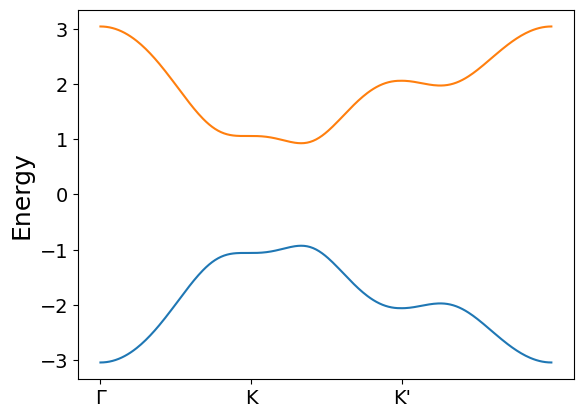

C:\Users\k708a\AppData\Local\Temp\ipykernel_12584\1003868932.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  band[j][i] = energy[0]


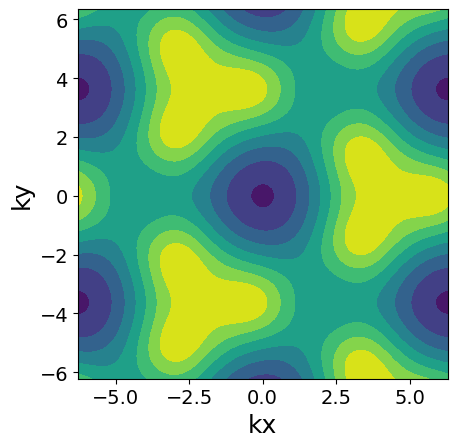

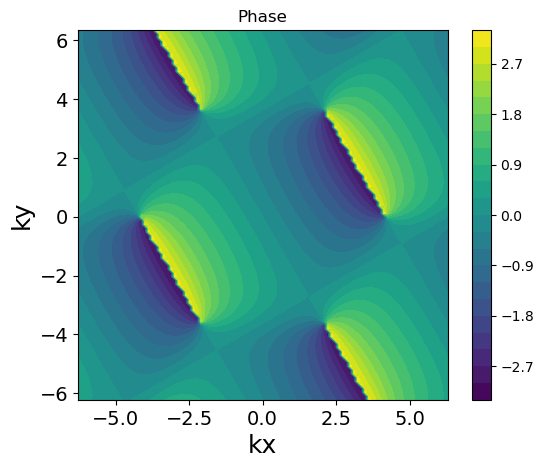

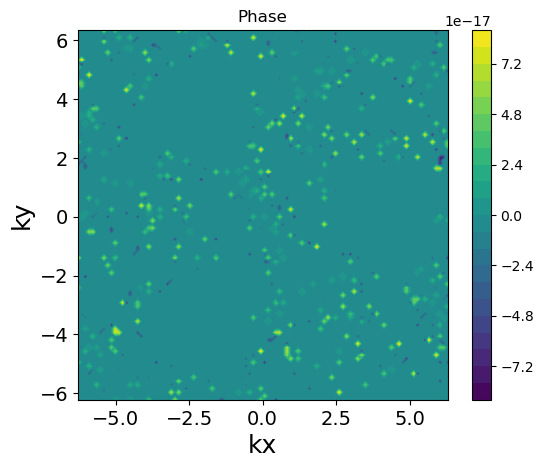

In [357]:
t = 1
it = 0.3
M = 0.5

#
kx1 = np.linspace(0,4/3*np.pi, 100)
ky1 = np.zeros(100)
kx2 = np.linspace(4/3*np.pi, 8/3*np.pi, 100)
ky2 = np.zeros(100)
kx3 = np.linspace(8/3*np.pi, 4*np.pi, 100)
ky3 = np.zeros(100)
kx = np.concatenate([kx1, kx2, kx3])
ky = np.concatenate([ky1, ky2, ky3])
calc_band_line(t, it, M, kx, ky)
#
#
Nkx = 100
Nky = 100
kx = np.linspace(-2*np.pi, 2*np.pi, Nkx)
ky = np.linspace(-2*np.pi, 2*np.pi, Nky) + 4*np.pi/Nky*0.5

vec0, vec1, angv, ang2  = calc_band_2D(t, it, M, kx, ky)
#
plot_ang(kx, ky, angv)
plot_ang(kx, ky, ang2)
# plot_abs(kx, ky, amp)


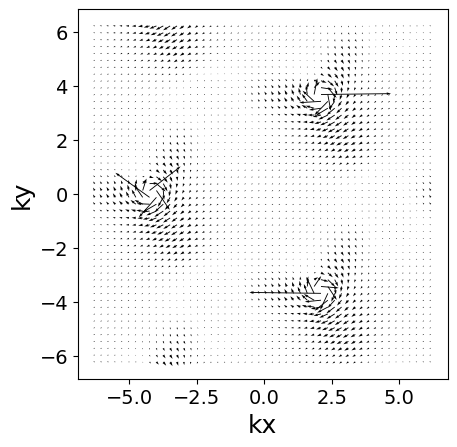

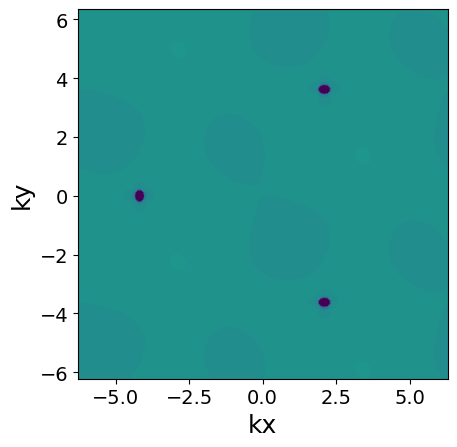

In [362]:
cx, cy = Berry_connection(kx, ky, vec0, 2, 10)
Berry_curvature(kx, ky, cx, cy, 0.3)

ABモデルでのMの符号依存を解決できない（Mの正負で似た結果になるはず）

対角化の過程で対角成分の位相がゼロになるようにしている（つまり、サイトAでの位相を基準にしている）が、強度が大きい成分が回るか小さい成分が回るかでベリー接続の結果が変わっているような気がする。

あるいは、波動関数の各成分の強度が波数依存性を持つから？

強度を補正すると正負で結果は一致するが、参考書のベリー接続の広がりを再現できない。

renormarizeを外すとMの符号問題は解決

しかし、Haldaneモデルで複素数のホッピングを入れるとK点を囲む変なベリー曲率が出る。

位相を見るとある領域で固定する波動関数が入れ替わっていることがわかったので、renormarizeはそれを補正するために加えた。
が、これがおかしいのかもしれない

メモ

renormarizeを外した時M依存性を再現できるのはなぜか。正負で入れ替えがあるかないかが変わるが、それの影響か。どちらのベクトルが回っているか。

ベクトルの大きさを変えるとベリー曲率に見かけの変化は出るか


In [311]:
def exp_f_R(n, m, kx):
    val = np.exp(complex(0, -n*kx))*np.exp(complex(0, -m*kx*0.5))
    return val

def calc_H_Haldane_R(kx,Ny,t, it, M):
    N = Ny*2
    mat_Htb = np.zeros((N,N), dtype = complex)   

    for m in range(Ny):            
        for dy in (-1, 0, 1):
            jy = m + dy 
            for a in (0, 1):
                if a == 0:
                    b = 1
                else:
                    b = 0
                ii = m*2+a# Index of terget atom
                jj = jy*2+b# Index of interacting atom (different kind)
                kk = jy*2+a# Index of interacting atom (same kind)
                if 0 <= jy and jy <= Ny -1:
                    if dy == 0 and a == 0:
                        mat_Htb[ii,jj] += -t-t*exp_f_R(-1, 0, kx)
                        mat_Htb[ii,kk] += complex(0,1)*it*(-exp_f_R(-1, 0, kx)+exp_f_R(1, 0, kx))
                        mat_Htb[ii,ii] += M 
                    elif dy == 1 and a ==0:
                        mat_Htb[ii,kk] += complex(0,1)*it*(-exp_f_R(0, 1, kx) + exp_f_R(-1, 1, kx))
                    elif dy == -1 and a ==0:
                        mat_Htb[ii,jj] += -t*exp_f_R(0, -1, kx)
                        mat_Htb[ii,kk] += complex(0,1)*it*(exp_f_R(0, -1, kx) - exp_f_R(1, -1, kx))
                    elif dy ==0 and a ==1:
                        mat_Htb[ii,jj] += -t-t*exp_f_R(1, 0, kx)
                        mat_Htb[ii,kk] += complex(0,1)*it*(exp_f_R(-1, 0, kx)-exp_f_R(1, 0, kx))
                        mat_Htb[ii,ii] += -M 
                    elif dy == -1 and a ==1:
                        mat_Htb[ii,kk] += complex(0,1)*it*(-exp_f_R(0, -1, kx) + exp_f_R(1, -1, kx))
                    elif dy == 1 and a ==1:
                        mat_Htb[ii,jj] += -t*exp_f_R(0, 1, kx)
                        mat_Htb[ii,kk] += complex(0,1)*it*(exp_f_R(0, 1, kx) - exp_f_R(-1, 1, kx))
    return mat_Htb


In [54]:
def calc_bands_Haldane(vkx, Ny, t, it, M):
    nkx = len(vkx)
    ep = np.zeros((nkx,Ny*2))
    cnt = 0
    for kx in vkx:
        mat_H = calc_H_Haldane_R(kx,Ny, t, it, M)    
        energy, mat_v  = np.linalg.eig(mat_H)
        ind = np.argsort(energy)
        energy = energy[ind]
        mat_v = mat_v.T[ind]
        for i in range(Ny*2):
            ep[cnt,i] = energy[i]
        cnt += 1
    return ep

def show_band_Haldane(vkx, ep):
    plt.rcParams.update(plt.rcParamsDefault)
    plt.plot(vkx,ep)
    plt.ylabel("Energy", fontsize = 18)
    plt.xlabel("kx", fontsize = 18)
    plt.tick_params(labelsize=14)
    plt.show()



C:\Users\k708a\AppData\Local\Temp\ipykernel_22360\3381677937.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  ep[cnt,i] = energy[i]


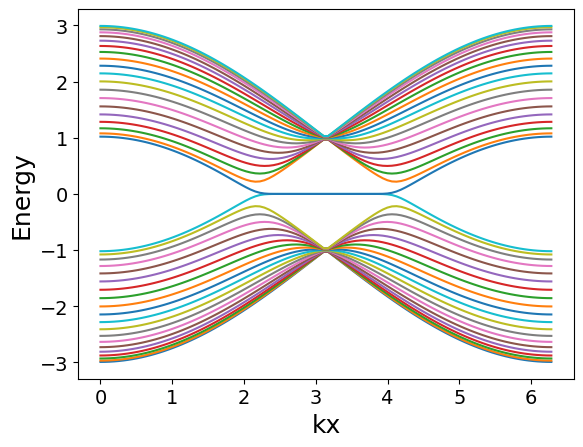

In [55]:
Ny = 20
nkx = 100
vkx = np.linspace(0,2* np.pi, nkx)
t = 1.0
it = 0
M = 0

ep = calc_bands_Haldane(vkx, Ny, t, it, M)
show_band_Haldane(vkx, ep)

C:\Users\k708a\AppData\Local\Temp\ipykernel_22360\3381677937.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  ep[cnt,i] = energy[i]


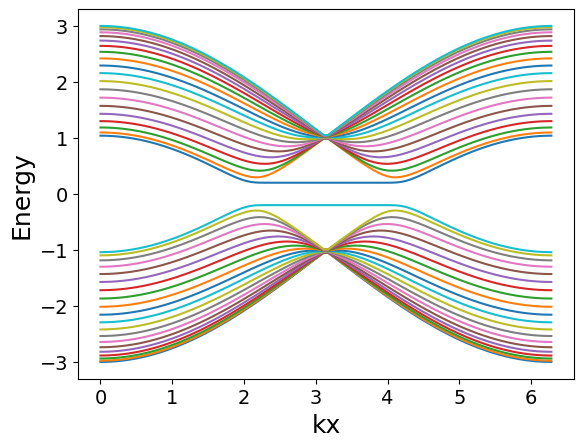

In [56]:
t = 1.0
it = 0
M = 0.2
ep = calc_bands_Haldane(vkx, Ny, t, it, M)
show_band_Haldane(vkx, ep)


C:\Users\k708a\AppData\Local\Temp\ipykernel_22360\3381677937.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  ep[cnt,i] = energy[i]


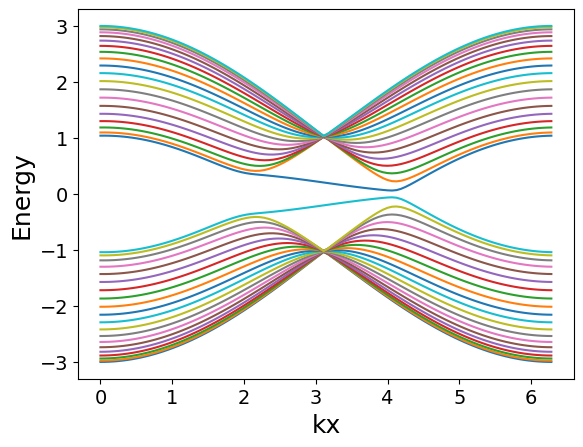

In [57]:
t = 1.0
it = 0.03
M = 0.2
ep = calc_bands_Haldane(vkx, Ny, t, it, M)
show_band_Haldane(vkx, ep)

C:\Users\k708a\AppData\Local\Temp\ipykernel_22360\3381677937.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  ep[cnt,i] = energy[i]


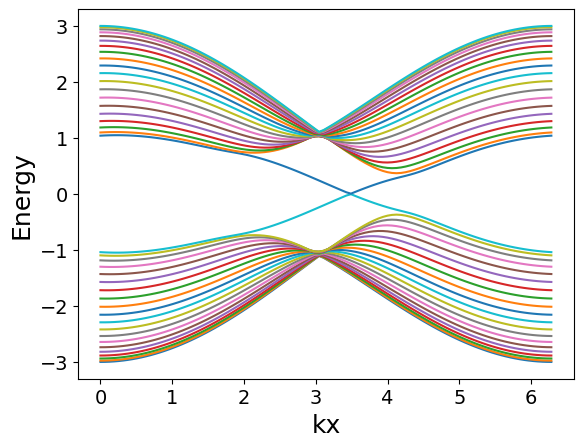

In [86]:
t = 1.0
it = 0.1
M = 0.2
ep = calc_bands_Haldane(vkx, Ny, t, it, M)
show_band_Haldane(vkx, ep)

## 2. Kane-Mele nidel

In [62]:
def exp_f_R(n, m, kx):
    val = np.exp(complex(0, -n*kx))*np.exp(complex(0, -m*kx*0.5))
    return val


def calc_H_KM_R(kx,Ny,t, it, M):
    N = Ny*4
    mat_Htb = np.zeros((N,N), dtype = complex)   

    for m in range(Ny):            
        for dy in (-1, 0, 1):
            jy = m + dy 
            for s in (0, 1):
                if s == 0:
                    fac = 1
                else:
                    fac = -1
                for a in (0, 1):
                    if a == 0:
                        b = 1
                    else:
                        b = 0
                    ii = m*4+a+s*2# Index of terget atom
                    jj = jy*4+b+s*2# Index of interacting atom (different kind)
                    kk = jy*4+a+s*2# Index of interacting atom (same kind)
                    if 0 <= jy and jy <= Ny -1:
                        if dy == 0 and a == 0:
                            mat_Htb[ii,jj] += -t-t*exp_f_R(-1, 0, kx)
                            mat_Htb[ii,kk] += complex(0,1)*it*fac*(-exp_f_R(-1, 0, kx)+exp_f_R(1, 0, kx))
                            mat_Htb[ii,ii] += M 
                        elif dy == 1 and a ==0:
                            mat_Htb[ii,kk] += complex(0,1)*it*fac*(-exp_f_R(0, 1, kx) + exp_f_R(-1, 1, kx))
                        elif dy == -1 and a ==0:
                            mat_Htb[ii,jj] += -t*exp_f_R(0, -1, kx)
                            mat_Htb[ii,kk] += complex(0,1)*it*fac*(exp_f_R(0, -1, kx) - exp_f_R(1, -1, kx))
                        elif dy ==0 and a ==1:
                            mat_Htb[ii,jj] += -t-t*exp_f_R(1, 0, kx)
                            mat_Htb[ii,kk] += complex(0,1)*it*fac*(exp_f_R(-1, 0, kx)-exp_f_R(1, 0, kx))
                            mat_Htb[ii,ii] += -M 
                        elif dy == -1 and a ==1:
                            mat_Htb[ii,kk] += complex(0,1)*it*fac*(-exp_f_R(0, -1, kx) + exp_f_R(1, -1, kx))
                        elif dy == 1 and a ==1:
                            mat_Htb[ii,jj] += -t*exp_f_R(0, 1, kx)
                            mat_Htb[ii,kk] += complex(0,1)*it*fac*(exp_f_R(0, 1, kx) - exp_f_R(-1, 1, kx))
    return mat_Htb


In [66]:
def calc_bands_KM(vkx, Ny, t, it, M):
    nkx = len(vkx)
    ep = np.zeros((nkx,Ny*4))
    cnt = 0
    for kx in vkx:
        mat_H = calc_H_KM_R(kx,Ny, t, it, M)    
        energy, mat_v  = np.linalg.eig(mat_H)
        ind = np.argsort(energy)
        energy = energy[ind]
        mat_v = mat_v.T[ind]
        for i in range(Ny*4):
            ep[cnt,i] = energy[i]
        cnt += 1
    return ep

def show_band_KM(vkx, ep):
    plt.rcParams.update(plt.rcParamsDefault)
    plt.plot(vkx,ep)
    plt.ylabel("Energy", fontsize = 18)
    plt.xlabel("kx", fontsize = 18)
    plt.tick_params(labelsize=14)
    plt.show()

In [36]:
Ny = 20
nkx = 100
vkx = np.linspace(0, 2*np.pi, nkx)
ep = np.zeros((nkx,Ny*4))

t = 1.0
it = 0.3
M = 0

ep = calc_bands_KM(vkx, Ny, t, it, M)
show_band_KM(vkx, ep)

NameError: name 'calc_bands_KM' is not defined